# Everything Else

 - Sentiment Analysis
 - Macro-Etymological Analysis
 
## Sentiment Analysis

Sentiment analysis is an automated attempt to guess at the polarity of the sentiment conveyed in a given expression. For example, if you have a corpus of movie reviews, and you're interested in knowing whether a given review is likely favorable or unfavorable to the movie, and reviews have sentences like: "I really loved this movie!" and "I thought this movie was terrible," then you can use sentiment analysis to try to guess the sentiment conveyed. Sentiment analysis, as typically performed, usually has two types. *Lexical* sentiment analysis looks up words in a dictionary. So you can imagine that it's not great with sentences like "I really didn't love this movie," since it will see "love" and will assume that it's a positive sentence. *Syntactic* or *probabilisitic* techniques, in contrast, take into account the structure of the sentence, and/or features learned (using machine learning) from labeled (manually entered) datasets, and are much better. But those techniques are much harder to do, so I'm just going to demonstrate a quick-and-dirty method, (i.e. easy, but inaccurate) using the `textblob` library. 

If you don't already have `textblob` (and I don't think it comes with Anaconda), you might have to run `conda install -c conda-forge textblob` from a terminal or command-line, in order to install it on Anaconda. 

In [6]:
from textblob import TextBlob
import pandas as pd
from nltk import sent_tokenize
%matplotlib inline

First, we'll get some test texts to play around with, from Dubliners: 

In [4]:
eveline = open('eveline.md').read()

In [5]:
eveline[:200]

'\n## EVELINE\n\nSHE sat at the window watching the evening invade the avenue. Her head\nwas leaned against the window curtains and in her nostrils was the odour\nof dusty cretonne. She was tired.\n\nFew peop'

Make it into a `TextBlob` object: 

In [6]:
evelineBlob = TextBlob(eveline)

Which gives us access to the `.sentiment` property, containing both `.polarity` and `.subjectivity`. Polarity is whether the sentence is positive or negative; subjectivity is how much sentiment is present. A sentence like "I really love this OMG!!!1!" would have high subjectivity, for instance, while a sentence like "the cat is in the house" would have low subjectivity. 

In [7]:
evelineBlob.sentiment

Sentiment(polarity=-0.008591667278107956, subjectivity=0.45734867298426624)

In [8]:
dubliners = open('dubliners.md').read()

In [9]:
dubParts = dubliners.split('##')

Grab a few stories: 

In [16]:
nope, sisters, encounter, araby, eveline = dubParts[:5]

In [20]:
eveline[:100]

' EVELINE\n\nSHE sat at the window watching the evening invade the avenue. Her head\nwas leaned against '

In [21]:
fourStories = [sisters, encounter, araby, eveline]
allStories = dubParts[1:]

Turn them into `TextBlob` objects: 

In [22]:
fourBlobs = [TextBlob(text).sentiment
            for text in fourStories]

Grab their sentiment polarities: 

In [24]:
fourSentiments = [item.polarity
                 for item in fourBlobs]

In [25]:
fourSentiments

[-0.008060086400893564,
 0.07032967290973487,
 -0.03624764467357063,
 -0.008591667278107956]

And plot them, labeling the rows while we're at it: 

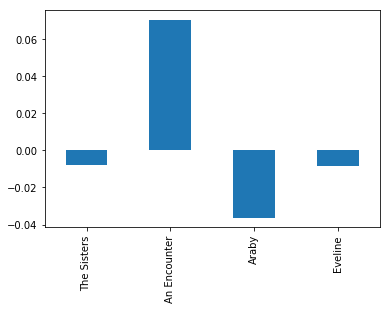

In [28]:
pd.Series(fourSentiments, index=['The Sisters', 'An Encounter', 
                                 'Araby', 'Eveline']).plot(kind='bar')

Let's try this again but with every sentence in "Eveline," as another example: 

In [7]:
eveline = open('eveline.md').read()

In [8]:
evelineSents = sent_tokenize(eveline)

How many sentences are there? 

In [9]:
len(evelineSents)

130

Make a list of all the polarities of all the sentences: 

In [10]:
evelineSentiments = [TextBlob(sent).sentiment.polarity
                    for sent in evelineSents]

And now we can iterate through all these, and the sentences too, zipping them together with `zip()` and writing a `for` loop to move through both of them at the same time: 

In [13]:
for sent, sentiment in zip(evelineSents, evelineSentiments): 
    print(sentiment, sent.replace('\n', ' ')[:80])

0.0  ## EVELINE  SHE sat at the window watching the evening invade the avenue.
-0.4 Her head was leaned against the window curtains and in her nostrils was the odou
-0.4 She was tired.
-0.2 Few people passed.
0.0715909090909091 The man out of the last house passed on his way home; she heard his footsteps cl
-0.125 One time there used to be a field there in which they used to play every evening
0.25625000000000003 Then a man from Belfast bought the field and built houses in it---not like their
-0.1875 The children of the avenue used to play together in that field---the Devines, th
0.0 Ernest, however, never played: he was too grown up.
-0.1875 Her father used often to hunt them in out of the field with his blackthorn stick
0.8 Still they seemed to have been rather happy then.
-0.29999999999999993 Her father was not so bad then; and besides, her mother was alive.
-0.125 That was a long time ago; she and her brothers and sisters were all grown up; he
-0.1 Tizzie Dunn was dead, too, and th

Finally, plot the sentiment polarity, by sentence: 

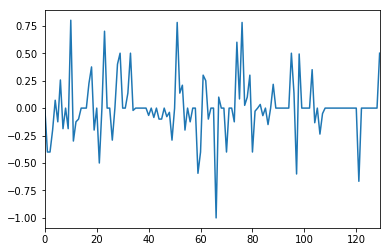

In [14]:
pd.Series(evelineSentiments).plot()

We can smooth that out using rolling averages: 

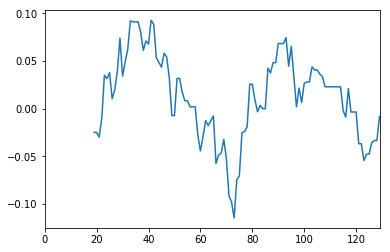

In [21]:
pd.Series(evelineSentiments).rolling(window=20).mean().plot()

We could also try that by paragraph, if we wanted: 

In [22]:
evelineParas = eveline.split('\n\n')

In [23]:
len(evelineParas)

28

In [24]:
evelinePSentiments = [TextBlob(par).sentiment.polarity
                     for par in evelineParas]

In [25]:
evelinePSentiments

[0.0,
 -0.4,
 -0.008890374331550792,
 0.021428571428571415,
 0.0,
 0.26166666666666666,
 0.0,
 0.13636363636363635,
 0.5,
 -0.0835873617123617,
 -0.060557040998217446,
 0.0,
 -0.4,
 0.193,
 -0.0775462962962963,
 0.0,
 0.14444444444444446,
 0.0,
 0.17034632034632033,
 -0.07518518518518519,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.8333333333333333,
 0.0,
 0.25,
 0.0]

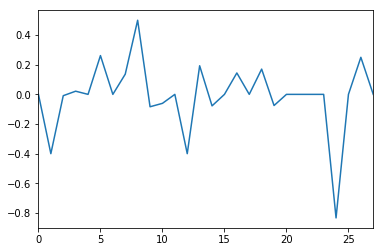

In [26]:
pd.Series(evelinePSentiments).plot()

# Macro-Etymological Analysis

Macro-etymological analysis simply looks up the parent languages, and parent language families, of each word in your text, and tabulates them accordingly. For this import statement to work, you must first have run `git clone` on [the `macroetym` repository](https://github.com/JonathanReeve/macro-etym), and either make sure the module is in your current working directory, or globally available, after installing it with something like `pip3 install .` or `conda install .`. This isn't easy to do, so let me know if you have trouble installing this, and we can work through it together. 

In [49]:
from macroetym import main

First, create a macro-etym `Text` object, and tell it the language is English. `Macro-etym` uses the standard three-letter language codes. 

In [51]:
eveText = main.Text(eveline, lang='eng')

Then, get language stats for "Eveline": 

In [54]:
eveText.getStats()

{'ang': 59.471094710947106,
 'deu': 0.36900369003690037,
 'dum': 0.36900369003690037,
 'fas': 0.12300123001230011,
 'fra': 5.07380073800738,
 'frm': 2.3062730627306274,
 'fro': 13.284132841328415,
 'grc': 1.107011070110701,
 'heb': 0.36900369003690037,
 'ita': 0.18450184501845018,
 'lat': 6.826568265682657,
 'non': 4.059040590405904,
 'xno': 6.4575645756457565}

That tells us that "Eveline" has 59% words of Old English (`ang` is the three-letter language code for Old English), 13% words of Old French origin, 9% words of Latin origin, etc. This can tell us a lot about the level of formality of the text, or its generic resonances. We can also get language family stats, too: 

In [55]:
eveText.getFamilyStats()

{'Germanic': [('ang', 59.471094710947106),
  ('non', 4.059040590405904),
  ('deu', 0.36900369003690037),
  ('dum', 0.36900369003690037)],
 'Hellenic': [('grc', 1.107011070110701)],
 'Indo-Iranian': [('fas', 0.12300123001230011)],
 'Latinate': [('fro', 13.284132841328415),
  ('fra', 5.07380073800738),
  ('xno', 6.4575645756457565),
  ('lat', 6.826568265682657),
  ('frm', 2.3062730627306274),
  ('ita', 0.18450184501845018)],
 'Semitic': [('heb', 0.36900369003690037)]}